<font color = "#CC3D3D"><p>
- Features
    - [Data load](#Data-load)
    - [EDA](#EDA)
- Feature Engineering
    - [Continuous features](#Continuous-features)
    - [One-hot encoding(categorical features)](#One-hot-encoding(categorical-features))
- Feature Extraction
    - [PCA](#PCA)
    - [Scaling(Normalization, Standardization)](#Scaling(Normalization,-Standardization))
- Feature Selection
    - [Feature selection](#Feature-selection)
- Modeling
    - [Modeling with bayes_opt](#Modeling-with-bayes_opt)
    - [Logistic Regression](#Logistic-Regression)
    - [Random Forest](#Random-Forest)
    - [XGB](#XGB)
    - [LGBM](#LGBM)
    - [Extra Tree](#Extra-Tree)
    - [GBM](#GBM)
    - [Adaboost](#Adaboost)
- Ensemble
    - [Stacking](#Stacking)
    - [meta model optimizing](#meta-model-optimizing)    
    - [ensemble](#ensemble)    
- Submission
    - [predict & submission](#predict-&-submission)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data load

In [2]:
tr = pd.read_csv('train.csv')
ts = pd.read_csv('test_x.csv')
submission=pd.read_csv('sample_submission.csv') 

In [3]:
# split train, test, target
target = tr.voted
tr.drop('voted', axis = 1, inplace = True)
tr_shape = tr.shape
ts_shape = ts.shape
df = pd.concat([tr, ts], ignore_index = True)

# EDA

In [5]:
# 문자형 피처) age_group, gender, race, religion (4개) -> 원핫인코딩

# 범주형(숫자형) 피처) education, engnat, hand, married, urban, wr_(01~13) wf_(01~03) (6개)
# 연속형(숫자형) 피처) Q_A Q_E (a~t), familysize, tp__(01~07) (3개)

In [24]:
features = []
features_te = []

In [4]:
f = train.groupby('CLNT_ID').agg({
    'CLAC3_NM': [('구매상품수(소)', lambda x: x.nunique())],
    'CLAC2_NM': [('구매상품수(중)', lambda x: x.nunique())],
    'CLAC1_NM': [('구매상품수(대)', lambda x: x.nunique())]
}).reset_index()
f.columns = drop_column_level(f)
features.append(f); display(f)

In [ ]:
data = pd.DataFrame({'CLNT_ID': train.CLNT_ID.unique()})
for f in features :
    data = pd.merge(data, f, how='left')
    
data = data.fillna(0)

# Continuous features

In [4]:
f1 = df.loc[:, 'QaA':'QtE'] ; f1

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595
56911,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722
56912,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171
56913,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,...,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870


# One-hot encoding(categorical features)

In [7]:
f2 = pd.get_dummies(df.age_group) ; f2

,+70s,10s,20s,30s,40s,50s,60s
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
56910,0,0,1,0,0,0,0
56911,0,1,0,0,0,0,0
56912,0,0,0,1,0,0,0
56913,0,0,0,0,1,0,0


In [5]:
f3 = pd.get_dummies(df.education)
f3.columns = ['edu_'+str(i) for i in f3.columns] ; f3

,edu_0,edu_1,edu_2,edu_3,edu_4
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
56910,0,0,0,1,0
56911,0,0,1,0,0
56912,0,0,0,0,1
56913,0,0,1,0,0


In [7]:
# 영어가 모국어인 사람 1=Yes, 2=No, 0=무응답
f4 = (df.engnat - 1).apply(lambda x : np.nan if x == -1 else x)

f4.fillna(f4.mean(), inplace = True) ; f4

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
56910    1.0
56911    1.0
56912    0.0
56913    0.0
56914    1.0
Name: engnat, Length: 56915, dtype: float64

In [8]:
# this is not categorical features
f5 = df.familysize ; f5

0        4
1        3
2        3
3        0
4        2
        ..
56910    3
56911    1
56912    4
56913    3
56914    2
Name: familysize, Length: 56915, dtype: int64

In [9]:
f6 = df.gender.apply(lambda x : 0 if x == 'Male' else 1) ; f6

0        1
1        1
2        0
3        1
4        0
        ..
56910    1
56911    1
56912    0
56913    1
56914    1
Name: gender, Length: 56915, dtype: int64

In [10]:
f7 = pd.get_dummies(df.hand)
f7.columns =['hand_'+str(i) for i in f7.columns] ; f7

,hand_0,hand_1,hand_2,hand_3
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
56910,0,1,0,0
56911,0,1,0,0
56912,0,1,0,0
56913,0,1,0,0


In [11]:
f8 = pd.get_dummies(df.married)
f8.columns = ['married_'+str(i) for i in f8.columns] ; f8

,married_0,married_1,married_2,married_3
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
56910,0,1,0,0
56911,0,1,0,0
56912,0,0,1,0
56913,0,0,1,0


In [12]:
f9 = pd.get_dummies(df.race) ; f9

,Arab,Asian,Black,Indigenous Australian,Native American,Other,White
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
56910,0,0,0,0,0,1,0
56911,0,1,0,0,0,0,0
56912,0,0,0,0,0,0,1
56913,0,0,0,0,0,0,1


In [13]:
f10 = pd.get_dummies(df.religion) ; f10

,Agnostic,Atheist,Buddhist,Christian_Catholic,Christian_Mormon,Christian_Other,Christian_Protestant,Hindu,Jewish,Muslim,Other,Sikh
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56910,0,0,0,1,0,0,0,0,0,0,0,0
56911,1,0,0,0,0,0,0,0,0,0,0,0
56912,0,1,0,0,0,0,0,0,0,0,0,0
56913,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
# is this categorical features?
f11 = df.loc[:, "tp01" : 'tp10'] ; f11

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
0,2,2,2,1,2,1,7,4,4,3
1,1,1,0,0,1,2,3,4,0,4
2,2,3,1,5,3,4,2,6,1,3
3,2,4,1,1,1,3,1,3,1,3
4,1,1,1,6,0,2,0,6,2,6
...,...,...,...,...,...,...,...,...,...,...
56910,1,0,0,3,0,4,1,0,4,5
56911,2,0,2,0,0,6,0,0,6,4
56912,4,2,1,6,1,2,1,6,0,5
56913,4,6,1,6,0,2,1,6,1,5


In [15]:
f12 = pd.get_dummies(df.urban) ; f12
f12.columns = ['urban_'+str(i) for i in f12.columns] ; f12

,urban_0,urban_1,urban_2,urban_3
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
56910,1,0,0,0
56911,0,0,1,0
56912,0,1,0,0
56913,0,0,1,0


In [16]:
f13 = df.loc[:, 'wf_01' : 'wr_13'] ; f13

,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
56911,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
56912,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1
56913,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0


# PCA

In [17]:
from sklearn.decomposition import PCA

def pca_df(df):
    max_col = df.shape[1] # 차원축소하려는 데이터의 column의 개수
    pca = PCA(n_components=max_col, random_state=0).fit(df)

    cumsum = np.cumsum(pca.explained_variance_ratio_) # 분산의 설명량을 누적합
    num_col = np.argmax(cumsum >= 0.99) + 1 # 분산의 설명량이 99%이상 되는 차원의 수

    # 차원축소
    pca = PCA(n_components = num_col, random_state=0).fit_transform(df)
    pca_f = pd.DataFrame(pca)
    return pca_f

In [18]:
# 문자형, 범주형 변수에만 PCA 가능

f2 = pca_df(f2) # age_group
f3 = pca_df(f3) # education
f7 = pca_df(f7) # hand
f8 = pca_df(f8) # married
f9 = pca_df(f9) # race
f10 = pca_df(f10) # religion
f12 = pca_df(f12) # urban
f13 = pca_df(f13) # wf, wr

In [19]:
# merge data
foo = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13], axis = 1)

In [20]:
train_x = foo[:45532]
test_x = foo[45532:]

In [21]:
# check data shape
print(train_x.shape, test_x.shape, target.shape)

(45532, 100) (11383, 100) (45532,)


# Scaling(Normalization, Standardization)

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

# 정규화
train_x = mms.fit_transform(train_x)
test_x = mms.transform(test_x)

# 표준화
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [23]:
# to dataframe
train_x = pd.DataFrame(train_x, columns = [str(i) for i in range(train_x.shape[1])])
test_x = pd.DataFrame(test_x, columns = [str(i) for i in range(test_x.shape[1])])

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_x, target)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train) # 

LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, lr.predict(x_valid)) # 실제값, 예측값

0.6889220767811649

In [29]:
pred_y = lr.predict_proba(test_x) ; pred_y

array([[0.2827586 , 0.7172414 ],
       [0.14543521, 0.85456479],
       [0.56348669, 0.43651331],
       ...,
       [0.76211563, 0.23788437],
       [0.59470882, 0.40529118],
       [0.3642082 , 0.6357918 ]])

In [30]:
submission.voted = pred_y[:,0] + pred_y[:,1]*2 ; submission

,index,voted
0,0,1.717241
1,1,1.854565
2,2,1.436513
3,3,1.151281
4,4,1.799323
...,...,...
11378,11378,1.326168
11379,11379,1.819626
11380,11380,1.237884
11381,11381,1.405291


In [109]:
a = submission['voted'] ;a

0        1.700330
1        1.848006
2        1.429785
3        1.166449
4        1.788305
           ...   
11378    1.347221
11379    1.833227
11380    1.232748
11381    1.385200
11382    1.639488
Name: voted, Length: 11383, dtype: float64

In [110]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
score = cross_val_score(rf, x_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)

In [113]:
score = np.mean(score)

In [114]:
pred_y = rf.predict_proba(test_x) ;pred_y

array([[0.25, 0.75],
       [0.17, 0.83],
       [0.49, 0.51],
       ...,
       [0.78, 0.22],
       [0.55, 0.45],
       [0.41, 0.59]])

In [115]:
b = pred_y[:,0] + pred_y[:,1]*2 ; b

array([1.75, 1.83, 1.51, ..., 1.22, 1.45, 1.59])

In [102]:
b = submission['voted'] ;b

0        1.71
1        1.87
2        1.48
3        1.19
4        1.82
         ... 
11378    1.50
11379    1.84
11380    1.32
11381    1.37
11382    1.64
Name: voted, Length: 11383, dtype: float64

In [132]:
submission.voted = (a+b)/2

In [134]:
submission.to_csv('maj34(8).csv', index = False)

In [ ]:
t = pd.Timestamp.now()
fname = f"submission_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
submission['voted']=pred_dnn+1
submission.to_csv(fname, index = False)

# Feature selection

In [26]:
from sklearn.calibration import CalibratedClassifierCV
from eli5.sklearn import PermutationImportance
import eli5
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

meta = CalibratedClassifierCV(LogisticRegression(random_state=0))
perm = PermutationImportance(meta.fit(train_x, target)).fit(train_x, target)

eli5.show_weights(perm, 
                  feature_names = train_x.columns.tolist(), 
                  top=(10))

Using TensorFlow backend.


Weight,Feature
0.0352 ± 0.0015,40
0.0235 ± 0.0012,47
0.0196 ± 0.0013,41
0.0191 ± 0.0009,57
0.0051 ± 0.0011,42
0.0049 ± 0.0009,45
0.0030 ± 0.0005,58
0.0029 ± 0.0021,46
0.0026 ± 0.0011,43
0.0022 ± 0.0011,66


In [27]:
perm_features_df = eli5.explain_weights_df(perm, feature_names = train_x.columns.tolist())
display(perm_features_df.head(10))
perm_features = perm_features_df.loc[perm_features_df['weight'] >= 0.001]['feature'].tolist()

,feature,weight,std
0,40,0.035166,0.000755
1,47,0.023539,0.000599
2,41,0.019560,0.000674
3,57,0.019147,0.000453
4,42,0.005082,0.000530
5,45,0.004880,0.000455
6,58,0.003040,0.000250
7,46,0.002890,0.001038
8,43,0.002644,0.000529
9,66,0.002223,0.000573


In [28]:
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = LogisticRegression(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []


########### cv 바꿔줌 ###############
sscv = StratifiedKFold(n_splits = 5, random_state = 0)

for p in tqdm(range(5,100,1)):
    nf = int(perm_features_df.shape[0] * p * 0.01)
    features_selected = perm_features_df.iloc[:nf].feature
    X_new = train_x[features_selected]
    cv_score = cross_val_score(model, X_new, target, scoring='roc_auc', cv=sscv).mean()
    cv_scores.append((p,cv_score))

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:43<00:00,  2.21it/s]


(48, 0.7613599526293553)


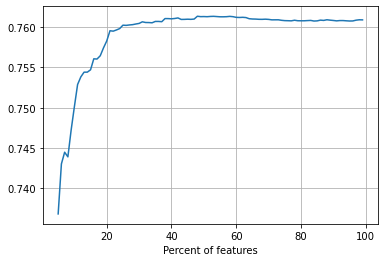

In [29]:
# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [30]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
nf = int(perm_features_df.shape[0] * best_score[0] * 0.01)
features_selected = perm_features_df.iloc[:nf].feature
train_x_sel = train_x[features_selected]
test_x_sel = test_x[features_selected]

# Modeling with bayes_opt

In [31]:
!pip install bayesian-optimization
!pip install lightgbm
!pip install xgboost

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11690 sha256=7e89b69d1b8cbcd41c49325613460df85f4c0b69177e6e8c70022f6569724c32
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\fd\9b\71\f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [140]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [141]:
# split data (train, validation)
X_train, X_valid, y_train, y_valid = train_test_split(train_x, target, test_size = 0.3, random_state = 0, stratify = target)

In [34]:
BO_tuned_clfs = []

## Logistic Regression

In [142]:
# 하이퍼 파라미터 범위

pbounds = { 'C': (0.1,1),}


def logreg_opt(C):
    
    params = {
        'C' : C
    }

    logreg = LogisticRegression(**params, n_jobs=-1, random_state=50)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
    
    score = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)


BO_logreg = BayesianOptimization(f = logreg_opt, pbounds = pbounds, random_state=0)

In [143]:
BO_logreg.maximize(init_points=50, n_iter=50)

|   iter    |  target   |     C     |
-------------------------------------
|  1        |  0.7604   |  0.5939   |
|  2        |  0.7604   |  0.7437   |
|  3        |  0.7604   |  0.6425   |
|  4        |  0.7604   |  0.5904   |
|  5        |  0.7604   |  0.4813   |
|  6        |  0.7604   |  0.6813   |
|  7        |  0.7604   |  0.4938   |
|  8        |  0.7604   |  0.9026   |
|  9        |  0.7604   |  0.9673   |
|  10       |  0.7604   |  0.4451   |
|  11       |  0.7604   |  0.8126   |
|  12       |  0.7604   |  0.576    |


KeyboardInterrupt: 

In [37]:
max_params = BO_logreg.max['params']

In [38]:
skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

logreg_clf = LogisticRegression(**max_params,  n_jobs=-1, random_state=50)

scores = cross_val_score(logreg_clf, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

BO_tuned_clfs.append((logreg_clf.__class__.__name__, logreg_clf, max(scores)))

[0.76079701 0.75963418 0.75603947 0.76846599]
최대성능: 0.7684659889925252
평균성능: 0.7612341621598808


## Random Forest

In [144]:
# 하이퍼 파라미터 범위

pbounds = { 'n_estimators': (10,250),
            'max_depth': (5,15), 
            'max_features': (0.8,0.95),
            'min_samples_leaf': (1, 5)}

def rf_opt(n_estimators, max_depth, max_features, min_samples_leaf):
    
    params = {
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'min_samples_leaf' : int(round(min_samples_leaf))
    }

    rf = RandomForestClassifier(**params, n_jobs=-1, random_state=50)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
    
    score = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)


BO_rf = BayesianOptimization(f = rf_opt, pbounds = pbounds, random_state=0)

In [145]:
BO_rf.maximize(init_points=50, n_iter=50)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.7647   |  10.49    |  0.9073   |  3.411    |  140.8    |
|  2        |  0.7646   |  9.237    |  0.8969   |  2.75     |  224.0    |
|  3        |  0.7629   |  14.64    |  0.8575   |  4.167    |  136.9    |
|  4        |  0.7587   |  10.68    |  0.9388   |  1.284    |  30.91    |
|  5        |  0.7612   |  5.202    |  0.9249   |  4.113    |  218.8    |
|  6        |  0.7638   |  14.79    |  0.9199   |  2.846    |  197.3    |
|  7        |  0.7628   |  6.183    |  0.896    |  1.573    |  236.7    |
|  8        |  0.7645   |  10.22    |  0.8622   |  2.058    |  195.8    |
|  9        |  0.7646   |  9.562    |  0.8853   |  1.075    |  158.2    |
|  10       |  0.765    |  11.12    |  0.8925   |  4.775    |  173.6    |
|  11       |  0.7622   |  8.595    |  0.8656   |  3.791    |  24.45    |
|  12       |  0.7592   |  11.67    | 

|  67       |  0.7619   |  14.87    |  0.9341   |  1.325    |  117.1    |
|  68       |  0.7621   |  14.89    |  0.95     |  1.0      |  128.3    |
|  69       |  0.7649   |  10.31    |  0.9105   |  4.824    |  181.9    |
|  70       |  0.7599   |  5.0      |  0.8      |  5.0      |  21.51    |
|  71       |  0.7647   |  7.958    |  0.8772   |  4.951    |  230.3    |
|  72       |  0.7639   |  14.89    |  0.8271   |  4.51     |  235.9    |
|  73       |  0.7635   |  14.88    |  0.9299   |  4.795    |  170.1    |
|  74       |  0.7613   |  5.0      |  0.8      |  5.0      |  179.8    |
|  75       |  0.7636   |  14.94    |  0.9446   |  4.914    |  183.6    |
|  76       |  0.7611   |  5.204    |  0.842    |  1.13     |  227.1    |
|  77       |  0.7636   |  15.0     |  0.95     |  5.0      |  203.9    |
|  78       |  0.7642   |  12.44    |  0.8      |  1.0      |  180.3    |
|  79       |  0.765    |  11.45    |  0.95     |  5.0      |  192.6    |
|  80       |  0.7647   |  12.86    | 

In [146]:
max_params = BO_rf.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['min_samples_leaf'] = int(round(max_params['min_samples_leaf']))

max_params

{'max_depth': 11,
 'max_features': 0.8925400995312135,
 'min_samples_leaf': 5,
 'n_estimators': 174}

In [147]:
rf_clf = RandomForestClassifier(**max_params,  n_jobs=-1, random_state=50)

scores = cross_val_score(rf_clf, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

#BO_tuned_clfs.append((rf_clf.__class__.__name__, rf_clf, max(scores)))

[0.76018477 0.75944439 0.75530185 0.76501509]
최대성능: 0.7650150856851279
평균성능: 0.7599865239758122


NameError: name 'BO_tuned_clfs' is not defined

In [152]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features=0.8925400995312135,
                       min_samples_leaf=5, n_estimators=174, n_jobs=-1,
                       random_state=50)

In [153]:
pred_y = rf_clf.predict_proba(test_x) ;pred_y

array([[0.36233222, 0.63766778],
       [0.1192966 , 0.8807034 ],
       [0.46299194, 0.53700806],
       ...,
       [0.77421041, 0.22578959],
       [0.62124815, 0.37875185],
       [0.30680197, 0.69319803]])

In [154]:
pred_y = pred_y[:,0] + pred_y[:,1]*2 ; pred_y

array([1.63766778, 1.8807034 , 1.53700806, ..., 1.22578959, 1.37875185,
       1.69319803])

In [155]:
submission['voted'] = pred_y; submission

,index,voted
0,0,1.637668
1,1,1.880703
2,2,1.537008
3,3,1.237163
4,4,1.759827
...,...,...
11378,11378,1.563642
11379,11379,1.891256
11380,11380,1.225790
11381,11381,1.378752


In [158]:
import seaborn as sns
f1 = pd.read_csv('maj347.csv')
f2 = pd.read_csv('maj34(8).csv')
f3 = pd.read_csv('maj34(9).csv')

In [159]:
f1 = f1.voted
f2 = f2.voted
f3 = f3.voted

In [164]:
submission.voted = (f1+f3)/2
submission.to_csv('ensemble_1.csv', index = False)

## XGB

In [43]:
# 하이퍼 파라미터 범위

pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 500),
            'max_depth': (5,15),   
            'subsample': (0.8,0.95),  
            'colsample': (0.75,0.95),   
            'gamma': (0, 5)}

def xgb_opt(learning_rate, n_estimators, max_depth, subsample, colsample, gamma):
    
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample': colsample,   
        'gamma': gamma,
        'n_jobs' : -1
    }
    
    xgb = XGBClassifier(**params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

    score = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_xgb = BayesianOptimization(f = xgb_opt, pbounds = pbounds, random_state=0)

In [44]:
BO_xgb.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.7001   |  0.8598   |  3.576    |  0.924    |  10.45    |  240.6    |  0.8969   |
|  2        |  0.6796   |  0.8375   |  4.459    |  1.447    |  8.834    |  406.3    |  0.8793   |
|  3        |  0.7634   |  0.8636   |  4.628    |  0.153    |  5.871    |  59.1     |  0.9249   |
|  4        |  0.6801   |  0.9056   |  4.35     |  1.469    |  12.99    |  257.7    |  0.9171   |
|  5        |  0.7341   |  0.7737   |  3.2      |  0.2579   |  14.45    |  284.8    |  0.8622   |
|  6        |  0.7116   |  0.8029   |  3.871    |  0.7114   |  10.68    |  58.46    |  0.8926   |
|  7        |  0.6804   |  0.8724   |  3.085    |  1.418    |  11.82    |  211.8    |  0.8656   |
|  8        |  0.6993   |  0.8895   |  0.3011   |  1.017    |  11.71    |  144.7    |  0.8193   |
|  9        |  0.696

|  51       |  0.7165   |  0.9463   |  3.72     |  0.7695   |  7.105    |  58.37    |  0.9432   |
|  52       |  0.7262   |  0.8361   |  4.805    |  0.7673   |  6.181    |  58.73    |  0.8961   |
|  53       |  0.7278   |  0.9309   |  1.693    |  0.3905   |  13.61    |  487.5    |  0.8709   |
|  54       |  0.7301   |  0.925    |  4.845    |  0.7935   |  5.302    |  59.56    |  0.872    |
|  55       |  0.7659   |  0.9314   |  4.007    |  0.07291  |  5.207    |  58.7     |  0.871    |
|  56       |  0.7651   |  0.75     |  3.832    |  0.05     |  5.705    |  59.28    |  0.95     |
|  57       |  0.7638   |  0.9207   |  3.493    |  0.1826   |  5.082    |  57.14    |  0.9225   |
|  58       |  0.7089   |  0.7853   |  3.474    |  1.153    |  5.161    |  57.8     |  0.9108   |
|  59       |  0.765    |  0.95     |  3.066    |  0.05     |  5.654    |  57.74    |  0.95     |
|  60       |  0.7561   |  0.7632   |  2.467    |  0.3629   |  5.067    |  55.17    |  0.8943   |
|  61       |  0.765

In [45]:
max_params = BO_xgb.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params

{'colsample': 0.9314364096383931,
 'gamma': 4.007451960090947,
 'learning_rate': 0.07290528556170314,
 'max_depth': 5,
 'n_estimators': 59,
 'subsample': 0.870995901642737}

In [46]:
xgb_clf = XGBClassifier(**max_params)

scores = cross_val_score(xgb_clf, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

BO_tuned_clfs.append((xgb_clf.__class__.__name__, xgb_clf, max(scores)))

[0.76613591 0.76420285 0.760671   0.77277149]
최대성능: 0.7727714903718759
평균성능: 0.7659453123972113


## LGBM

In [47]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 500),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'colsample_bytree': (0.75,0.9),   
            'num_leaves': (2,10),
            'min_child_weight': (1, 7)}


def lgbm_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1
    }
    
    lgbm = LGBMClassifier(**params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

    score = cross_val_score(lgbm, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_lgbm = BayesianOptimization(f = lgbm_opt, pbounds = pbounds, random_state=1)  

In [48]:
BO_lgbm.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.7526   |  0.8126   |  1.094    |  3.001    |  2.814    |  116.0    |  2.739    |  0.8279   |
|  2        |  0.7497   |  0.8018   |  0.6253   |  6.772    |  3.515    |  358.3    |  3.636    |  0.9317   |
|  3        |  0.7458   |  0.7541   |  1.022    |  5.921    |  4.352    |  113.2    |  3.585    |  0.9201   |
|  4        |  0.7584   |  0.8952   |  0.5045   |  7.846    |  6.258    |  452.6    |  2.68     |  0.8059   |
|  5        |  0.6984   |  0.7755   |  1.323    |  3.688    |  3.527    |  481.1    |  6.265    |  0.9038   |
|  6        |  0.7014   |  0.7973   |  1.045    |  8.842    |  1.11     |  387.6    |  9.911    |  0.9122   |
|  7        |  0.7186   |  0.7921   |  1.194    |  3.723    |  3.687    |  458.9    |  4.349    |  0.8432   |
|  8      

|  45       |  0.7629   |  0.8389   |  0.5028   |  9.414    |  6.458    |  165.7    |  2.887    |  0.8289   |
|  46       |  0.7121   |  0.8249   |  1.106    |  4.457    |  2.488    |  433.3    |  5.327    |  0.8925   |
|  47       |  0.7641   |  0.785    |  0.1979   |  6.611    |  3.863    |  118.7    |  6.974    |  0.8816   |
|  48       |  0.7571   |  0.8481   |  0.2596   |  8.261    |  2.332    |  283.7    |  8.282    |  0.8033   |
|  49       |  0.6888   |  0.7987   |  1.316    |  8.913    |  4.231    |  440.0    |  9.598    |  0.924    |
|  50       |  0.7594   |  0.8781   |  0.1932   |  7.559    |  5.221    |  324.6    |  8.397    |  0.8052   |
|  51       |  0.7555   |  0.7743   |  0.5953   |  7.896    |  2.865    |  495.9    |  2.668    |  0.8072   |
|  52       |  0.7619   |  0.8509   |  0.6169   |  7.067    |  5.791    |  169.2    |  2.533    |  0.8984   |
|  53       |  0.7461   |  0.7833   |  1.282    |  9.459    |  1.635    |  171.1    |  2.8      |  0.9119   |
|  54     

|  90       |  0.7637   |  0.8298   |  0.2261   |  3.286    |  6.359    |  82.39    |  2.648    |  0.8876   |
|  91       |  0.7527   |  0.9      |  0.05     |  4.65     |  1.0      |  78.36    |  2.0      |  0.8      |
|  92       |  0.7633   |  0.8743   |  0.05336  |  3.276    |  4.532    |  279.2    |  2.628    |  0.8998   |
|  93       |  0.7646   |  0.75     |  0.05     |  10.0     |  7.0      |  277.5    |  4.144    |  0.95     |
|  94       |  0.7511   |  0.8049   |  0.3631   |  5.633    |  3.728    |  274.8    |  7.826    |  0.8057   |
|  95       |  0.759    |  0.8308   |  1.239    |  8.979    |  6.994    |  283.8    |  2.392    |  0.9245   |
|  96       |  0.7578   |  0.9      |  1.5      |  10.0     |  1.0      |  278.7    |  2.0      |  0.95     |
|  97       |  0.7475   |  0.8008   |  0.6296   |  9.757    |  6.631    |  72.57    |  9.934    |  0.9316   |
|  98       |  0.7527   |  0.9      |  0.05     |  10.0     |  1.0      |  97.0     |  2.0      |  0.95     |
|  99     

In [49]:
max_params = BO_lgbm.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['num_leaves'] = int(round(max_params['num_leaves']))

max_params

{'colsample_bytree': 0.8124210338525666,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 1.3775741782035542,
 'n_estimators': 135,
 'num_leaves': 10,
 'subsample': 0.802578631594766}

In [50]:
lgbm_clf = LGBMClassifier(**max_params)

scores = cross_val_score(lgbm_clf, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

BO_tuned_clfs.append((lgbm_clf.__class__.__name__, lgbm_clf, max(scores)))

[0.76704555 0.76435784 0.76089909 0.77330857]
최대성능: 0.7733085736865913
평균성능: 0.7664027627819948


## Extra Tree

In [51]:
pbounds = { 'n_estimators': (50, 500),
            'max_depth': (3,10),    
            'max_features': (0.8,0.95),
            'min_samples_split': (2, 5),
            'min_samples_leaf': (1, 5)
            }

def extra_opt(n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf):

    params = {
        'n_estimators': int(round(n_estimators)),
        'max_depth': int(round(max_depth)),
        'max_features' : max_features,
        'min_samples_leaf': int(round(min_samples_leaf)),
        'min_samples_split': int(round(min_samples_split)),
        'n_jobs' : -1
    }
    
    extra = ExtraTreesClassifier(bootstrap = True, oob_score=True, **params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

    score = cross_val_score(extra, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_extra = BayesianOptimization(f = extra_opt, pbounds = pbounds, random_state=0)    

In [52]:
BO_extra.maximize(init_points=50, n_iter=50)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.764    |  6.842    |  0.9073   |  3.411    |  3.635    |  240.6    |
|  2        |  0.765    |  7.521    |  0.8656   |  4.567    |  4.891    |  222.5    |
|  3        |  0.7652   |  8.542    |  0.8793   |  3.272    |  4.777    |  81.97    |
|  4        |  0.758    |  3.61     |  0.803    |  4.33     |  4.334    |  441.5    |
|  5        |  0.765    |  9.85     |  0.9199   |  2.846    |  4.342    |  103.2    |
|  6        |  0.7641   |  7.479    |  0.8215   |  4.779    |  3.566    |  236.6    |
|  7        |  0.7603   |  4.852    |  0.9161   |  2.825    |  3.705    |  58.46    |
|  8        |  0.7642   |  7.323    |  0.8918   |  3.468    |  4.831    |  356.8    |
|  9        |  0.7628   |  5.517    |  0.8656   |  3.791    |  2.181    |  350.0    |
|  10       |  0.7646   |  7.694    |  0.8316   |  1.5

|  58       |  0.7532   |  3.015    |  0.9452   |  3.049    |  2.024    |  219.0    |
|  59       |  0.7652   |  9.41     |  0.8887   |  4.616    |  4.766    |  228.0    |
|  60       |  0.7632   |  6.465    |  0.9188   |  4.976    |  2.139    |  169.2    |
|  61       |  0.765    |  9.499    |  0.9433   |  2.333    |  3.969    |  208.7    |
|  62       |  0.7655   |  9.998    |  0.8303   |  1.666    |  2.169    |  494.6    |
|  63       |  0.761    |  4.529    |  0.872    |  2.019    |  3.997    |  494.8    |
|  64       |  0.7651   |  10.0     |  0.8      |  1.0      |  5.0      |  164.6    |
|  65       |  0.758    |  3.507    |  0.8818   |  4.032    |  4.514    |  126.1    |
|  66       |  0.7651   |  9.393    |  0.9416   |  4.644    |  2.149    |  484.6    |
|  67       |  0.7581   |  3.932    |  0.937    |  4.906    |  2.176    |  484.8    |
|  68       |  0.7653   |  10.0     |  0.8      |  1.0      |  5.0      |  224.7    |
|  69       |  0.7656   |  9.94     |  0.8085   |  1.0

In [53]:
max_params = BO_extra.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['min_samples_leaf'] = int(round(max_params['min_samples_leaf']))
max_params['min_samples_split'] = int(round(max_params['min_samples_split']))

max_params

{'max_depth': 10,
 'max_features': 0.8739027312882421,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 377}

In [54]:
extra_clf = ExtraTreesClassifier(bootstrap = True, oob_score=True, **max_params)

scores = cross_val_score(extra_clf, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

BO_tuned_clfs.append((extra_clf.__class__.__name__, extra_clf, max(scores)))

[0.76880292 0.76232182 0.76071851 0.77097248]
최대성능: 0.7709724837281234
평균성능: 0.7657039347613478


## GBM
- GBM은 시간이 매우 오래 걸리지만, 성능은 그닥 좋지 않음. 스킵해도 무방.

In [55]:
'''pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 500),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'min_samples_split': (2,5),   
            'min_samples_leaf': (1,5)}


def gbm_opt(learning_rate, n_estimators, max_depth, subsample, min_samples_split, min_samples_leaf):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'min_samples_split' : int(round(min_samples_split)),
        'min_samples_leaf' : int(round(min_samples_leaf))
    }
    
    gbm = GradientBoostingClassifier(**params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

    score = cross_val_score(gbm, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_gbm = BayesianOptimization(f = gbm_opt, pbounds = pbounds, random_state=0)    '''

"pbounds = { 'learning_rate': (0.05, 1.5),\n            'n_estimators': (50, 500),\n            'max_depth': (3,10),   \n            'subsample': (0.8,0.95), \n            'min_samples_split': (2,5),   \n            'min_samples_leaf': (1,5)}\n\n\ndef gbm_opt(learning_rate, n_estimators, max_depth, subsample, min_samples_split, min_samples_leaf):\n\n    params = {\n        'learning_rate': learning_rate,\n        'n_estimators' : int(round(n_estimators)),\n        'max_depth' : int(round(max_depth)),\n        'subsample': subsample,\n        'min_samples_split' : int(round(min_samples_split)),\n        'min_samples_leaf' : int(round(min_samples_leaf))\n    }\n    \n    gbm = GradientBoostingClassifier(**params)\n    \n    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)\n\n    score = cross_val_score(gbm, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)\n    \n    return np.mean(score)\n\nBO_gbm = BayesianOptimization(f = gbm_opt, pbounds = pbounds, random_stat

In [56]:
'''BO_gbm.maximize(init_points=50, n_iter=50)'''

'BO_gbm.maximize(init_points=50, n_iter=50)'

In [57]:
'''max_params = BO_gbm.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['min_samples_leaf'] = int(round(max_params['min_samples_leaf']))
max_params['min_samples_split'] = int(round(max_params['min_samples_split']))

max_params'''

"max_params = BO_gbm.max['params']\n\nmax_params['n_estimators'] = int(round(max_params['n_estimators']))\nmax_params['max_depth'] = int(round(max_params['max_depth']))\nmax_params['min_samples_leaf'] = int(round(max_params['min_samples_leaf']))\nmax_params['min_samples_split'] = int(round(max_params['min_samples_split']))\n\nmax_params"

In [58]:
'''gbm_clf = GradientBoostingClassifier(**max_params)

scores = cross_val_score(gbm_clf, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

BO_tuned_clfs.append((gbm_clf.__class__.__name__, gbm_clf, max(scores)))'''

"gbm_clf = GradientBoostingClassifier(**max_params)\n\nscores = cross_val_score(gbm_clf, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)\n\nprint(scores)\nprint(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')\n\nBO_tuned_clfs.append((gbm_clf.__class__.__name__, gbm_clf, max(scores)))"

## Adaboost

In [59]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 500),
}


def ada_opt(learning_rate, n_estimators):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators))
    }
    
    ada = AdaBoostClassifier(**params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

    score = cross_val_score(ada, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_ada = BayesianOptimization(f = ada_opt, pbounds = pbounds, random_state=0)  

In [60]:
BO_ada.maximize(init_points=50, n_iter=50)

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.7579   |  0.8458   |  371.8    |
|  2        |  0.7577   |  0.924    |  295.2    |
|  3        |  0.7587   |  0.6643   |  340.7    |
|  4        |  0.7579   |  0.6845   |  451.3    |
|  5        |  0.7557   |  1.447    |  222.5    |
|  6        |  0.757    |  1.198    |  288.0    |
|  7        |  0.757    |  0.8737   |  466.5    |
|  8        |  0.7591   |  0.153    |  89.21    |
|  9        |  0.7607   |  0.07932  |  424.7    |
|  10       |  0.7561   |  1.178    |  441.5    |
|  11       |  0.7543   |  1.469    |  409.6    |
|  12       |  0.7581   |  0.7191   |  401.2    |
|  13       |  0.7605   |  0.2215   |  338.0    |
|  14       |  0.7601   |  0.2579   |  475.1    |
|  15       |  0.7588   |  0.8067   |  236.6    |
|  16       |  0.7594   |  0.4336   |  398.4    |
|  17       |  0.7587   |  0.7114   |  305.8    |
|  18       |  0.7603   |  0.07725  |  327.9    |


|  100      |  0.7595   |  0.07367  |  214.0    |


In [61]:
max_params = BO_ada.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))

max_params

{'learning_rate': 0.192114100473329, 'n_estimators': 216}

In [62]:
ada_clf = AdaBoostClassifier(**max_params)

scores = cross_val_score(ada_clf, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

BO_tuned_clfs.append((ada_clf.__class__.__name__, ada_clf, max(scores)))

[0.76034834 0.75942227 0.75634583 0.76710281]
최대성능: 0.7671028143356372
평균성능: 0.7608048133088864


# Stacking

In [63]:
estimators = [(i[0], i[1]) for i in BO_tuned_clfs]

In [64]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19884 sha256=d00236b2e3ee78bd5e257e8696029db5f062005f6321f280951fda43c07ddbd9
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\28\fe\0c\fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [65]:
from vecstack import StackingTransformer
stack = StackingTransformer(estimators, regression=False, needs_proba=True, metric=None,
                            n_folds=3, stratified=True, shuffle=True, random_state=0)
stack = stack.fit(X_train, y_train)

# Get your stacked features
S_train = stack.transform(X_train)
S_valid = stack.transform(X_valid)
S_test = stack.transform(test_x_sel)

[03:46:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:46:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:46:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bi

In [66]:
# for final ensemble
df2_s_train = S_train.copy()
df2_s_valid = S_valid.copy()
df2_s_test =  S_test.copy()

## meta model optimizing

### meta-lgbm

In [67]:
pbounds = { 'learning_rate': (0.01, 1.5),
            'n_estimators': (50, 500),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'colsample_bytree': (0.75,0.9),   
            'num_leaves': (2,10),
            'min_child_weight': (1, 7)}


def meta_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1
    }
    
    meta_model = LGBMClassifier(**params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=True, random_state=1)

    score = cross_val_score(meta_model, S_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_meta = BayesianOptimization(f = meta_opt, pbounds = pbounds, random_state=1)

In [68]:
BO_meta.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.7538   |  0.8126   |  1.083    |  3.001    |  2.814    |  116.0    |  2.739    |  0.8279   |
|  2        |  0.7467   |  0.8018   |  0.6012   |  6.772    |  3.515    |  358.3    |  3.636    |  0.9317   |
|  3        |  0.748    |  0.7541   |  1.009    |  5.921    |  4.352    |  113.2    |  3.585    |  0.9201   |
|  4        |  0.7558   |  0.8952   |  0.477    |  7.846    |  6.258    |  452.6    |  2.68     |  0.8059   |
|  5        |  0.699    |  0.7755   |  1.318    |  3.688    |  3.527    |  481.1    |  6.265    |  0.9038   |
|  6        |  0.7016   |  0.7973   |  1.033    |  8.842    |  1.11     |  387.6    |  9.911    |  0.9122   |
|  7        |  0.7221   |  0.7921   |  1.186    |  3.723    |  3.687    |  458.9    |  4.349    |  0.8432   |
|  8      

|  45       |  0.7604   |  0.8389   |  0.4753   |  9.414    |  6.458    |  165.7    |  2.887    |  0.8289   |
|  46       |  0.7162   |  0.8249   |  1.096    |  4.457    |  2.488    |  433.3    |  5.327    |  0.8925   |
|  47       |  0.7631   |  0.785    |  0.1619   |  6.611    |  3.863    |  118.7    |  6.974    |  0.8816   |
|  48       |  0.7541   |  0.8481   |  0.2254   |  8.261    |  2.332    |  283.7    |  8.282    |  0.8033   |
|  49       |  0.6911   |  0.7987   |  1.311    |  8.913    |  4.231    |  440.0    |  9.598    |  0.924    |
|  50       |  0.7577   |  0.8781   |  0.1571   |  7.559    |  5.221    |  324.6    |  8.397    |  0.8052   |
|  51       |  0.7528   |  0.7743   |  0.5704   |  7.896    |  2.865    |  495.9    |  2.668    |  0.8072   |
|  52       |  0.7609   |  0.75     |  0.01     |  8.355    |  4.548    |  170.1    |  2.402    |  0.8      |
|  53       |  0.7627   |  0.8293   |  0.5212   |  5.661    |  1.838    |  65.17    |  2.758    |  0.8517   |
|  54     

|  90       |  0.7649   |  0.9      |  0.01     |  8.405    |  1.0      |  50.0     |  4.693    |  0.9419   |
|  91       |  0.7619   |  0.75     |  1.5      |  10.0     |  1.0      |  136.7    |  2.0      |  0.8      |
|  92       |  0.7618   |  0.8863   |  0.593    |  4.439    |  6.878    |  50.4     |  3.768    |  0.9091   |
|  93       |  0.7657   |  0.7726   |  0.06639  |  3.038    |  6.128    |  152.3    |  3.519    |  0.8284   |
|  94       |  0.765    |  0.7866   |  0.3691   |  8.902    |  1.488    |  148.7    |  2.11     |  0.8864   |
|  95       |  0.7392   |  0.7765   |  0.7693   |  3.204    |  1.492    |  151.8    |  7.744    |  0.9092   |
|  96       |  0.7658   |  0.75     |  0.01     |  3.0      |  7.0      |  279.1    |  2.903    |  0.95     |
|  97       |  0.7198   |  0.8871   |  0.9403   |  3.713    |  1.634    |  275.7    |  7.281    |  0.8144   |
|  98       |  0.7608   |  0.75     |  0.01     |  3.0      |  7.0      |  159.6    |  2.0      |  0.8      |
|  99     

In [69]:
max_params = BO_meta.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['num_leaves'] = int(round(max_params['num_leaves']))

max_params

{'colsample_bytree': 0.75,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 5.053612401427161,
 'n_estimators': 472,
 'num_leaves': 3,
 'subsample': 0.95}

In [70]:
meta_clf = LGBMClassifier(**max_params)

skf = StratifiedKFold(n_splits=4 , shuffle=True, random_state=1)

scores = cross_val_score(meta_clf, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

[0.75866854 0.75013918 0.75855817 0.76274653]
최대성능: 0.762746528391972
평균성능: 0.7575281045528965


In [71]:
meta_clf.fit(S_train, y_train)

LGBMClassifier(colsample_bytree=0.75, learning_rate=0.01, max_depth=10,
               min_child_weight=5.053612401427161, n_estimators=472,
               num_leaves=3, subsample=0.95)

### LR-meta

In [72]:
# 하이퍼 파라미터 범위

pbounds = { 'C': (0.1,1),}


def logreg_meta(C):
    
    params = {
        'C' : C
    }

    logreg = LogisticRegression(**params, n_jobs=-1, random_state=50)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
    
    score = cross_val_score(logreg, S_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)


BO_logreg = BayesianOptimization(f = logreg_meta, pbounds = pbounds, random_state=0)

In [73]:
BO_logreg.maximize(init_points=50, n_iter=50)

|   iter    |  target   |     C     |
-------------------------------------
|  1        |  0.7662   |  0.5939   |
|  2        |  0.7662   |  0.7437   |
|  3        |  0.7662   |  0.6425   |
|  4        |  0.7662   |  0.5904   |
|  5        |  0.7662   |  0.4813   |
|  6        |  0.7662   |  0.6813   |
|  7        |  0.7662   |  0.4938   |
|  8        |  0.7662   |  0.9026   |
|  9        |  0.7662   |  0.9673   |
|  10       |  0.7662   |  0.4451   |
|  11       |  0.7662   |  0.8126   |
|  12       |  0.7662   |  0.576    |
|  13       |  0.7662   |  0.6112   |
|  14       |  0.7662   |  0.933    |
|  15       |  0.7663   |  0.1639   |
|  16       |  0.7663   |  0.1784   |
|  17       |  0.7663   |  0.1182   |
|  18       |  0.7662   |  0.8494   |
|  19       |  0.7662   |  0.8003   |
|  20       |  0.7662   |  0.883    |
|  21       |  0.7662   |  0.9808   |
|  22       |  0.7662   |  0.8192   |
|  23       |  0.7662   |  0.5153   |
|  24       |  0.7662   |  0.8025   |
|  25       

In [74]:
max_params = BO_logreg.max['params']

max_params

{'C': 0.1001800856967334}

In [75]:
skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

logreg_meta = LogisticRegression(**max_params,  n_jobs=-1, random_state=50)

scores = cross_val_score(logreg_meta, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

[0.76079727 0.7596338  0.75603896 0.76846618]
최대성능: 0.7684661796729919
평균성능: 0.7612340509296085


In [76]:
logreg_meta.fit(S_train, y_train)

LogisticRegression(C=0.1001800856967334, n_jobs=-1, random_state=50)

### xgb-meta

In [77]:
# 하이퍼 파라미터 범위

pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 100),
            'max_depth': (5,15),   
            'subsample': (0.8,0.95),  
            'colsample': (0.75,0.95),   
            'gamma': (0, 5)}

def xgb_meta(learning_rate, n_estimators, max_depth, subsample, colsample, gamma):
    
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample': colsample,   
        'gamma': gamma,
        'n_jobs' : -1
    }
    
    xgb = XGBClassifier(**params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

    score = cross_val_score(xgb, S_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_xgb = BayesianOptimization(f = xgb_meta, pbounds = pbounds, random_state=0)

In [78]:
BO_xgb.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.6969   |  0.8598   |  3.576    |  0.924    |  10.45    |  71.18    |  0.8969   |
|  2        |  0.6762   |  0.8375   |  4.459    |  1.447    |  8.834    |  89.59    |  0.8793   |
|  3        |  0.7622   |  0.8636   |  4.628    |  0.153    |  5.871    |  51.01    |  0.9249   |
|  4        |  0.6773   |  0.9056   |  4.35     |  1.469    |  12.99    |  73.07    |  0.9171   |
|  5        |  0.7351   |  0.7737   |  3.2      |  0.2579   |  14.45    |  76.09    |  0.8622   |
|  6        |  0.7144   |  0.8029   |  3.871    |  0.7114   |  10.68    |  50.94    |  0.8926   |
|  7        |  0.6746   |  0.8724   |  3.085    |  1.418    |  11.82    |  67.98    |  0.8656   |
|  8        |  0.694    |  0.8895   |  0.3011   |  1.017    |  11.71    |  60.52    |  0.8193   |
|  9        |  0.694

|  51       |  0.7464   |  0.8231   |  4.215    |  0.5793   |  5.481    |  51.19    |  0.9097   |
|  52       |  0.7621   |  0.9157   |  4.034    |  0.1095   |  6.35     |  51.55    |  0.8345   |
|  53       |  0.747    |  0.8699   |  4.907    |  0.4851   |  6.685    |  51.36    |  0.9486   |
|  54       |  0.7635   |  0.7654   |  3.741    |  0.06911  |  6.371    |  50.41    |  0.9374   |
|  55       |  0.7571   |  0.932    |  2.569    |  0.2318   |  5.73     |  50.17    |  0.8894   |
|  56       |  0.7594   |  0.8649   |  2.173    |  0.2203   |  5.053    |  51.6     |  0.8928   |
|  57       |  0.7617   |  0.889    |  2.452    |  0.1301   |  6.219    |  52.93    |  0.9292   |
|  58       |  0.7646   |  0.95     |  3.258    |  0.05     |  5.0      |  53.4     |  0.8      |
|  59       |  0.7646   |  0.95     |  1.533    |  0.05     |  5.0      |  53.87    |  0.8      |
|  60       |  0.7636   |  0.95     |  2.833    |  0.05     |  6.081    |  55.1     |  0.8      |
|  61       |  0.761

In [79]:
max_params = BO_xgb.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params

{'colsample': 0.75,
 'gamma': 5.0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 73,
 'subsample': 0.8}

In [80]:
xgb_meta = XGBClassifier(**max_params)

scores = cross_val_score(xgb_meta, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

[0.76749333 0.76453254 0.76000423 0.77208142]
최대성능: 0.7720814177626609
평균성능: 0.7660278770393196


In [81]:
xgb_meta.fit(S_train, y_train)

[03:56:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample=0.75,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=5.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=73, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

### extra-meta

In [82]:
pbounds = { 'n_estimators': (50, 250),
            'max_depth': (3,10),    
            'max_features': (0.8,0.95),
            'min_samples_split': (2, 5),
            'min_samples_leaf': (1, 5)
            }

def extra_meta(n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf):

    params = {
        'n_estimators': int(round(n_estimators)),
        'max_depth': int(round(max_depth)),
        'max_features' : max_features,
        'min_samples_leaf': int(round(min_samples_leaf)),
        'min_samples_split': int(round(min_samples_split)),
        'n_jobs' : -1
    }
    
    extra = ExtraTreesClassifier(bootstrap = True, oob_score=True, **params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

    score = cross_val_score(extra, S_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_extra = BayesianOptimization(f = extra_meta, pbounds = pbounds, random_state=0)    

In [83]:
BO_extra.maximize(init_points=50, n_iter=50)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.7657   |  6.842    |  0.9073   |  3.411    |  3.635    |  134.7    |
|  2        |  0.7652   |  7.521    |  0.8656   |  4.567    |  4.891    |  126.7    |
|  3        |  0.7646   |  8.542    |  0.8793   |  3.272    |  4.777    |  64.21    |
|  4        |  0.7662   |  3.61     |  0.803    |  4.33     |  4.334    |  224.0    |
|  5        |  0.764    |  9.85     |  0.9199   |  2.846    |  4.342    |  73.65    |
|  6        |  0.7656   |  7.479    |  0.8215   |  4.779    |  3.566    |  132.9    |
|  7        |  0.7659   |  4.852    |  0.9161   |  2.825    |  3.705    |  53.76    |
|  8        |  0.7656   |  7.323    |  0.8918   |  3.468    |  4.831    |  186.4    |
|  9        |  0.766    |  5.517    |  0.8656   |  3.791    |  2.181    |  183.4    |
|  10       |  0.7654   |  7.694    |  0.8316   |  1.5

|  58       |  0.766    |  3.0      |  0.95     |  1.0      |  4.723    |  57.51    |
|  59       |  0.7656   |  7.24     |  0.9276   |  4.905    |  2.219    |  175.0    |
|  60       |  0.7662   |  3.0      |  0.95     |  1.0      |  5.0      |  193.6    |
|  61       |  0.7642   |  9.667    |  0.8      |  5.0      |  2.0      |  153.6    |
|  62       |  0.7661   |  3.256    |  0.9156   |  2.594    |  4.775    |  143.3    |
|  63       |  0.766    |  3.0      |  0.8      |  1.0      |  2.0      |  112.4    |
|  64       |  0.7661   |  3.0      |  0.95     |  1.0      |  5.0      |  219.8    |
|  65       |  0.7637   |  10.0     |  0.95     |  1.0      |  5.0      |  142.3    |
|  66       |  0.7662   |  3.203    |  0.8904   |  4.838    |  3.502    |  148.4    |
|  67       |  0.7662   |  3.0      |  0.8      |  5.0      |  2.0      |  139.4    |
|  68       |  0.7663   |  3.169    |  0.8004   |  1.115    |  2.781    |  150.3    |
|  69       |  0.7663   |  3.0      |  0.8      |  5.0

In [84]:
max_params = BO_extra.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['min_samples_leaf'] = int(round(max_params['min_samples_leaf']))
max_params['min_samples_split'] = int(round(max_params['min_samples_split']))

max_params

{'max_depth': 3,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 197}

In [85]:
extra_meta = ExtraTreesClassifier(bootstrap = True, oob_score=True, **max_params)

scores = cross_val_score(extra_meta, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

[0.75496934 0.75109773 0.74859693 0.75864185]
최대성능: 0.7586418453242003
평균성능: 0.753326460467776


In [86]:
extra_meta.fit(S_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_depth=3, max_features=0.8,
                     n_estimators=197, oob_score=True)

### adaboost-meta

In [87]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 300),
}


def ada_meta(learning_rate, n_estimators):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators))
    }
    
    ada = AdaBoostClassifier(**params)
    
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)

    score = cross_val_score(ada, S_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

BO_ada = BayesianOptimization(f = ada_meta, pbounds = pbounds, random_state=0)   

In [88]:
BO_ada.maximize(init_points=50, n_iter=50)

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.7631   |  0.8458   |  228.8    |
|  2        |  0.7628   |  0.924    |  186.2    |
|  3        |  0.7631   |  0.6643   |  211.5    |
|  4        |  0.7631   |  0.6845   |  272.9    |
|  5        |  0.7612   |  1.447    |  145.9    |
|  6        |  0.7614   |  1.198    |  182.2    |
|  7        |  0.7626   |  0.8737   |  281.4    |
|  8        |  0.7655   |  0.153    |  71.78    |
|  9        |  0.7655   |  0.07932  |  258.2    |
|  10       |  0.7613   |  1.178    |  267.5    |
|  11       |  0.7597   |  1.469    |  249.8    |
|  12       |  0.763    |  0.7191   |  245.1    |
|  13       |  0.7649   |  0.2215   |  210.0    |
|  14       |  0.7647   |  0.2579   |  286.2    |
|  15       |  0.7633   |  0.8067   |  153.7    |
|  16       |  0.7636   |  0.4336   |  243.6    |
|  17       |  0.7633   |  0.7114   |  192.1    |
|  18       |  0.7656   |  0.07725  |  204.4    |


|  100      |  0.7615   |  1.436    |  161.5    |


In [89]:
max_params = BO_ada.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))

max_params

{'learning_rate': 0.05, 'n_estimators': 230}

In [90]:
ada_meta = AdaBoostClassifier(**max_params)

scores = cross_val_score(ada_meta, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

[0.75781976 0.75753374 0.7534179  0.76502325]
최대성능: 0.7650232531651209
평균성능: 0.7584486621763111


In [91]:
ada_meta.fit(S_train, y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=230)

### meta voting

In [92]:
from sklearn.ensemble import VotingClassifier
meta_voting = VotingClassifier(estimators = [('meta_ADA', ada_meta),('meta_LR',logreg_meta ), ('meta_EXTRA', extra_meta), ('meta_LGBM', meta_clf), ('meta_XGB', xgb_meta)], voting='soft')
meta_voting.fit(S_train, y_train)

[04:10:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




VotingClassifier(estimators=[('meta_ADA',
                              AdaBoostClassifier(learning_rate=0.05,
                                                 n_estimators=230)),
                             ('meta_LR',
                              LogisticRegression(C=0.1001800856967334,
                                                 n_jobs=-1, random_state=50)),
                             ('meta_EXTRA',
                              ExtraTreesClassifier(bootstrap=True, max_depth=3,
                                                   max_features=0.8,
                                                   n_estimators=197,
                                                   oob_score=True)),
                             ('meta_LGBM',
                              LGBMClassifier(colsample_bytree=0.75,
                                             learning_r...
                                            gpu_id=-1, importance_type='gain',
                                            inter

In [93]:
cross_val_score(meta_voting, S_valid, y_valid, scoring='roc_auc', cv=4, n_jobs=-1)

array([0.76583503, 0.77110945, 0.7679754 , 0.767928  ])

# ensemble

# predict & submission

In [94]:
pred_y = meta_voting.predict_proba(S_test)[:, 0] + meta_voting.predict_proba(S_test)[:, 1] * 2
submission['voted']=pred_y

In [95]:
import datetime

submission.to_csv(f'submission_{str(datetime.datetime.now().date())}.csv', index = False)